# Importing libraries

In [2]:

import pandas as pd
import re
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
import string
import matplotlib.pyplot as plt
import nltk


# importing datasets

In [4]:
data_fake = pd.read_csv('fake.csv')
data_real = pd.read_csv('real.csv')

In [5]:
data_real.head()

,Title,Description
0,फिल्म ‘भगवत् गीता’मा धिरज अनुबन्धित,फिल्म ‘भगवत् गीता’मा नायक धिरज मगर अनुबन्धित ह...
1,पब्जी विश्वकपमा नेपाल दोस्रो,पब्जी विश्वकपमा नेपाल दोस्रो भएको छ । इन्डोनेस...
2,मोदीको मातृभक्ति : आमाको खुट्टा धोएर लिए आशीर्वाद,भारतका प्रधानमन्त्री नरेन्द्र मोदीले आफ्नी आमा...
3,‘लोकतन्त्रप्रति प्रतिबद्ध नेतृत्व आउँछ’– निधि,कांग्रेसको १४ औं महाधिवेशमा नेतृत्व चयनका लागि...
4,'पथेर' र 'कदम'लाई पहिचान पुरस्कार,यस वर्ष पहिचान पुरस्कार श्याम शाहको कथासंग्रह ...


In [6]:
data_fake.head()

,Title,Description
0,ट्रम्पडम: ट्रम्पको विदेश नीतिको जिज्ञासु संसा...,निरज श्रीवास्तव 21st Century WireIt डोनाल्ड ट्...
1,BREAKING: वफादार ट्रम्प समर्थकले महान्यायाधिवक...,"सेन जेफरसन ब्यूरेगार्ड सेसन्स III, डोनाल्ड ट्र..."
2,चीन ड्रोन ड्रामा ट्रम्पको पहिलो ट्वीट भन्दा पह...,डोनाल्ड ट्रम्पले अमेरिकी अन्डरवाटर ड्रोन जफत ग...
3,एक रक्षात्मक जोन केरीले सोध्छ कि इजरायलले आफ्न...,जोन केरीले ओबामा प्रशासन इजरायलको मित्र भएको द...
4,Reince Priebus ट्रम्पको दाबीलाई समर्थन गर्दछ क...,डोनाल्ड ट्रम्पले स्वतन्त्र प्रेस बिरूद्ध युद्ध...


# classify the data fake as 0 and real as1 1

In [8]:
data_fake["class"]= 0
data_real["class"]= 1

In [9]:
# c

# Concatinating the fake and real data

In [11]:
data = pd.concat([data_real,data_fake],axis=0)
data.head()

,Title,Description,class
0,फिल्म ‘भगवत् गीता’मा धिरज अनुबन्धित,फिल्म ‘भगवत् गीता’मा नायक धिरज मगर अनुबन्धित ह...,1
1,पब्जी विश्वकपमा नेपाल दोस्रो,पब्जी विश्वकपमा नेपाल दोस्रो भएको छ । इन्डोनेस...,1
2,मोदीको मातृभक्ति : आमाको खुट्टा धोएर लिए आशीर्वाद,भारतका प्रधानमन्त्री नरेन्द्र मोदीले आफ्नी आमा...,1
3,‘लोकतन्त्रप्रति प्रतिबद्ध नेतृत्व आउँछ’– निधि,कांग्रेसको १४ औं महाधिवेशमा नेतृत्व चयनका लागि...,1
4,'पथेर' र 'कदम'लाई पहिचान पुरस्कार,यस वर्ष पहिचान पुरस्कार श्याम शाहको कथासंग्रह ...,1


# Droping the column name Title

In [13]:
cleaned_data= data.drop(['Title'],axis=1, inplace=False)
cleaned_data.head(10)


,Description,class
0,फिल्म ‘भगवत् गीता’मा नायक धिरज मगर अनुबन्धित ह...,1
1,पब्जी विश्वकपमा नेपाल दोस्रो भएको छ । इन्डोनेस...,1
2,भारतका प्रधानमन्त्री नरेन्द्र मोदीले आफ्नी आमा...,1
3,कांग्रेसको १४ औं महाधिवेशमा नेतृत्व चयनका लागि...,1
4,यस वर्ष पहिचान पुरस्कार श्याम शाहको कथासंग्रह ...,1
5,गुल्मीको इस्मा गाउँपालिका–३ गहतेका गोकर्ण नेपा...,1
6,नेपालबाट दैनिक सयौं युवा रोजगारीका लागि विदेशि...,1
7,रूसले युक्रेनमाथिको आक्रमणलाई तीव्र गतिमा अघि ...,1
8,पोखरा महानगरपालिका– ६ बैदाममा मुख्य कार्यालय र...,1
9,आईसीसी विश्वकप क्रिकेट लिग–२ अन्तर्गत नामिबिया...,1


Text(0, 0.5, 'Frequency')

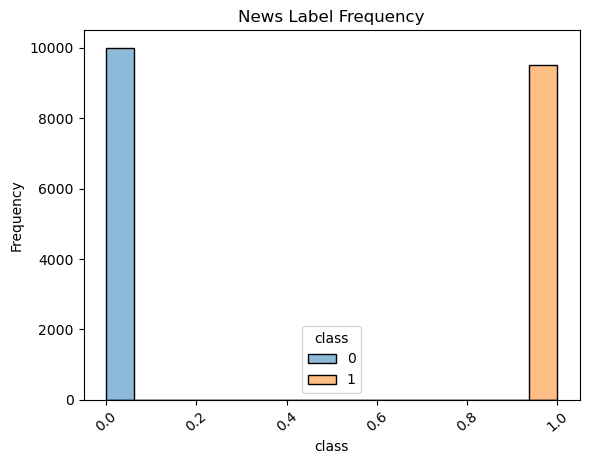

In [14]:
import seaborn as sbs
sbs.histplot(x='class', hue='class', data=cleaned_data)
plt.title('News Label Frequency')
plt.xticks(rotation=40)
plt.ylabel('Frequency')

In [15]:
# As we can observe that there is equal amount of fake and real data 
# Also we can observe that first only real data is present in the datasets and then fake so for that we suffle the data

# Suffling the data

In [17]:
suffle_data = cleaned_data.sample(frac=1)
suffle_data.head(10)

,Description,class
542,राणाकालीन दरबारभित्र पाक्ने खानाका परिकार र पक...,1
3108,यो एकदम सुरक्षित शर्त हो कि प्रेसले डोनाल्ड र...,0
753,म बोल्दैछु आज म बोल्दैछु आज हिम्मत गरेर के ति...,1
581,अमेरिकी प्रतिनिधि जिम क्लाइबर्नले आफूलाई तातो ...,0
6974,ठूलो नगद पुरस्कार राशिको वीर गणेशमान सिंह स्मृ...,1
2072,सिरियाको उत्तरी सहर एलेप्पोमा बुधबार एउटा पाँच...,1
6633,राष्ट्रपति ट्रम्पले भर्खरै अलाबामाका रोय मूरको...,0
139,"डलास, TX मा ब्ल्याक लाइभ्स म्याटरको विरोधमा ड...",0
4947,"बागलुङको जैमिनी र गल्कोट नगरपालिका, काठेखोला र...",1
2886,पूर्व रियालिटी शो स्टार बनेका राष्ट्रपति निर्व...,0


# Due to suffleing, the column also gets suffeled
#So reseting new index of the dataframe to its default integer_based indexing.

In [19]:
# due to suffleing the index also gets suffeled.
# So reseting new index of the dataframe to its default integer_based indexing.
suffle_data.reset_index(inplace=True)
suffle_data.head()

,index,Description,class
0,542,राणाकालीन दरबारभित्र पाक्ने खानाका परिकार र पक...,1
1,3108,यो एकदम सुरक्षित शर्त हो कि प्रेसले डोनाल्ड र...,0
2,753,म बोल्दैछु आज म बोल्दैछु आज हिम्मत गरेर के ति...,1
3,581,अमेरिकी प्रतिनिधि जिम क्लाइबर्नले आफूलाई तातो ...,0
4,6974,ठूलो नगद पुरस्कार राशिको वीर गणेशमान सिंह स्मृ...,1


In [20]:
suffle_data.drop(['index'],axis=1,inplace = True)
suffle_data.head(5)

,Description,class
0,राणाकालीन दरबारभित्र पाक्ने खानाका परिकार र पक...,1
1,यो एकदम सुरक्षित शर्त हो कि प्रेसले डोनाल्ड र...,0
2,म बोल्दैछु आज म बोल्दैछु आज हिम्मत गरेर के ति...,1
3,अमेरिकी प्रतिनिधि जिम क्लाइबर्नले आफूलाई तातो ...,0
4,ठूलो नगद पुरस्कार राशिको वीर गणेशमान सिंह स्मृ...,1


# Checking null value

In [22]:
suffle_data.isnull().sum()

Description    0
class          0
dtype: int64

# since there is no null value in our datasets we can do further preprocessig

In [24]:
suffle_data.to_csv('mixed.csv', index=False)
data = pd.read_csv('mixed.csv')
data.head()

,Description,class
0,राणाकालीन दरबारभित्र पाक्ने खानाका परिकार र पक...,1
1,यो एकदम सुरक्षित शर्त हो कि प्रेसले डोनाल्ड र...,0
2,म बोल्दैछु आज म बोल्दैछु आज हिम्मत गरेर के ति...,1
3,अमेरिकी प्रतिनिधि जिम क्लाइबर्नले आफूलाई तातो ...,0
4,ठूलो नगद पुरस्कार राशिको वीर गणेशमान सिंह स्मृ...,1


# Preprocessing removing unwanted symbol, numbers,english word,nepali numbers

In [26]:
import re
import string

def wordopt(Description):
   
    # Remove square brackets and their contents
    Description = re.sub(r'\[.*?\]', '', Description)
    # Remove URLs
    Description = re.sub(r'https?://\S+|www\.\S+', '', Description)
    # Remove HTML tags
    Description = re.sub(r'<.*?>', '', Description)
    # Remove punctuation
    Description = re.sub(f'[{re.escape(string.punctuation)}]', '', Description)
    # Remove newlines
    Description = re.sub(r'\n', ' ', Description)
    # Remove words containing digits
    Description = re.sub(r'\w*\d\w*', '', Description)
    # Remove English words (if only Nepali words are needed)
    Description = re.sub(r'\b[a-zA-Z]+\b', '', Description)
    # Remove extra whitespace
    Description = re.sub(r'\s+', ' ', Description).strip()
    
    return Description


In [27]:
data['Description2']= data['Description'].apply (wordopt)
data.head(5)

,Description,class,Description2
0,राणाकालीन दरबारभित्र पाक्ने खानाका परिकार र पक...,1,राणाकालीन दरबारभित्र पाक्ने खानाका परिकार र पक...
1,यो एकदम सुरक्षित शर्त हो कि प्रेसले डोनाल्ड र...,0,यो एकदम सुरक्षित शर्त हो कि प्रेसले डोनाल्ड र ...
2,म बोल्दैछु आज म बोल्दैछु आज हिम्मत गरेर के ति...,1,म बोल्दैछु आज म बोल्दैछु आज हिम्मत गरेर के तिम...
3,अमेरिकी प्रतिनिधि जिम क्लाइबर्नले आफूलाई तातो ...,0,अमेरिकी प्रतिनिधि जिम क्लाइबर्नले आफूलाई तातो ...
4,ठूलो नगद पुरस्कार राशिको वीर गणेशमान सिंह स्मृ...,1,ठूलो नगद पुरस्कार राशिको वीर गणेशमान सिंह स्मृ...


In [28]:
data.to_csv('cleaned_data.csv', index=False)

In [29]:
data.columns

Index(['Description', 'class', 'Description2'], dtype='object')

# Tokenization 

In [31]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
data['tokens1'] = data['Description2'].apply(word_tokenize)
data.head()

,Description,class,Description2,tokens1
0,राणाकालीन दरबारभित्र पाक्ने खानाका परिकार र पक...,1,राणाकालीन दरबारभित्र पाक्ने खानाका परिकार र पक...,"[राणाकालीन, दरबारभित्र, पाक्ने, खानाका, परिकार..."
1,यो एकदम सुरक्षित शर्त हो कि प्रेसले डोनाल्ड र...,0,यो एकदम सुरक्षित शर्त हो कि प्रेसले डोनाल्ड र ...,"[यो, एकदम, सुरक्षित, शर्त, हो, कि, प्रेसले, डो..."
2,म बोल्दैछु आज म बोल्दैछु आज हिम्मत गरेर के ति...,1,म बोल्दैछु आज म बोल्दैछु आज हिम्मत गरेर के तिम...,"[म, बोल्दैछु, आज, म, बोल्दैछु, आज, हिम्मत, गरे..."
3,अमेरिकी प्रतिनिधि जिम क्लाइबर्नले आफूलाई तातो ...,0,अमेरिकी प्रतिनिधि जिम क्लाइबर्नले आफूलाई तातो ...,"[अमेरिकी, प्रतिनिधि, जिम, क्लाइबर्नले, आफूलाई,..."
4,ठूलो नगद पुरस्कार राशिको वीर गणेशमान सिंह स्मृ...,1,ठूलो नगद पुरस्कार राशिको वीर गणेशमान सिंह स्मृ...,"[ठूलो, नगद, पुरस्कार, राशिको, वीर, गणेशमान, सि..."


In [32]:
data.to_csv('tokenize.csv', index=False)

# Stop words removal

In [34]:
# Define the path to your stopwords text file
stopwords_file_path = "nepali_stopwords.txt"

# Load the stopwords into a list or set
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    nepali_stopwords = {line.strip() for line in file}

# Check the stopwords
print(f"Loaded {len(nepali_stopwords)} Nepali stopwords.")
print(nepali_stopwords)


Loaded 280 Nepali stopwords.
{'मुख्य', 'चाहन्छु', 'चाँडै', 'गए', 'हुनेछ', 'किन', 'दोश्रो', 'या', 'म', 'अझै', 'सँग', 'कृपया', 'नै', 'वाहेक', 'तल', 'गैर', 'गर्छु', 'त्यसैले', 'तथा', 'निर्दिष्ट', 'बाटो', 'हाम्रो', 'हुने', 'आत्म', 'अन्यथा', 'छन्', 'भन्दा', 'सबैलाई', 'गरेर', 'माथि', 'यसपछि', 'कम से कम', 'केही', 'आफ्नो', 'के', 'गर्ने', 'उनले', 'कोही', 'चार', 'चाहिए', 'किनभने', 'ठीक', 'आए', 'आठ', 'अलग', 'गरी', 'निम्न', 'मा', 'यति', 'सोध्न', 'पहिले', 'तुरुन्तै', 'सही', 'जबकि', 'उनको', 'सात', 'उहाँलाई', 'पछिल्लो', 'होइनन्', 'कसैले', 'अन्तर्गत', 'भन्छन्', 'प्रति', 'थिए', 'जो', 'देखेर', 'पनि', 'देखि', 'तापनि', 'यी', 'गर्यौं', 'देखिन्छ', 'पर्थ्यो', 'तर', 'भन्नुभयो', 'नयाँ', 'भित्री', 'अन्य', 'पक्कै', 'यद्यपि', 'यसको', 'कुरा', 'सो', 'उप', 'गरेको', 'विरुद्ध', 'अर्थात्', 'भन्छु', 'सक्छ', 'गरि', 'बने', 'देखे', 'जसले', 'त्यो', 'होस्', 'कसरी', 'जसको', 'यदि', 'हुन', 'विशेष', 'जसबाट', 'पहिल्यै', 'रही', 'औं', 'थिएनन्', 'होला', 'दिनुभएको', 'आफ्नै', 'राम्रो', 'गरेका', 'तिनीहरूलाई', 'त्यसकारण', 'राखे', 'वरिपर

In [35]:
def remove_stopwords_nepali(tokens, stopwords):

    filtered_tokens = []

    for token in tokens:
        original_token = token
        token_modified = False

        # Check for full word matches and suffixes
        for stopword in stopwords:
            if token == stopword:  # Remove stopword if it's a full word
                token = ""
                token_modified = True
                break  # No need to check further stopwords if one has been removed

            elif token.endswith(stopword):  # Check if stopword is a suffix
                remaining_token = token[:-len(stopword)].strip()
                if remaining_token:  # Only modify if the remaining token is valid
                    token = remaining_token
                    token_modified = True
                    break  # No need to check further stopwords if one has been removed

        # Add only non-empty tokens and those that are meaningfully modified
        if token and (not token_modified or token != original_token):
            filtered_tokens.append(token)

    return filtered_tokens

In [36]:
data['stopwords'] = data['tokens1'].apply(lambda x: remove_stopwords_nepali(x, nepali_stopwords))
data.head(20)

,Description,class,Description2,tokens1,stopwords
0,राणाकालीन दरबारभित्र पाक्ने खानाका परिकार र पक...,1,राणाकालीन दरबारभित्र पाक्ने खानाका परिकार र पक...,"[राणाकालीन, दरबारभित्र, पाक्ने, खानाका, परिकार...","[राणाकाली, दरबार, पाक्ने, खाना, परिका, पकाउने,..."
1,यो एकदम सुरक्षित शर्त हो कि प्रेसले डोनाल्ड र...,0,यो एकदम सुरक्षित शर्त हो कि प्रेसले डोनाल्ड र ...,"[यो, एकदम, सुरक्षित, शर्त, हो, कि, प्रेसले, डो...","[एकद, सुरक्षि, शर्, प्रेस, डोनाल्ड, उनकी, पत्न..."
2,म बोल्दैछु आज म बोल्दैछु आज हिम्मत गरेर के ति...,1,म बोल्दैछु आज म बोल्दैछु आज हिम्मत गरेर के तिम...,"[म, बोल्दैछु, आज, म, बोल्दैछु, आज, हिम्मत, गरे...","[बोल्दै, आज, बोल्दै, आज, हिम्म, सुन्, तया, छौ,..."
3,अमेरिकी प्रतिनिधि जिम क्लाइबर्नले आफूलाई तातो ...,0,अमेरिकी प्रतिनिधि जिम क्लाइबर्नले आफूलाई तातो ...,"[अमेरिकी, प्रतिनिधि, जिम, क्लाइबर्नले, आफूलाई,...","[अमेरिकी, प्रतिनिधि, जि, क्लाइबर्न, तातो, पानी..."
4,ठूलो नगद पुरस्कार राशिको वीर गणेशमान सिंह स्मृ...,1,ठूलो नगद पुरस्कार राशिको वीर गणेशमान सिंह स्मृ...,"[ठूलो, नगद, पुरस्कार, राशिको, वीर, गणेशमान, सि...","[ठूलो, नगद, पुरस्का, राशि, वी, गणेशमा, सिंह, स..."
5,सिरियाको उत्तरी सहर एलेप्पोमा बुधबार एउटा पाँच...,1,सिरियाको उत्तरी सहर एलेप्पोमा बुधबार एउटा पाँच...,"[सिरियाको, उत्तरी, सहर, एलेप्पोमा, बुधबार, एउट...","[सिरिया, उत्तरी, सह, एलेप्पो, बुधबा, एउटा, पाँ..."
6,राष्ट्रपति ट्रम्पले भर्खरै अलाबामाका रोय मूरको...,0,राष्ट्रपति ट्रम्पले भर्खरै अलाबामाका रोय मूरको...,"[राष्ट्रपति, ट्रम्पले, भर्खरै, अलाबामाका, रोय,...","[राष्ट्रपति, ट्रम्प, भर्खरै, अलाबामा, रोय, मूर..."
7,"डलास, TX मा ब्ल्याक लाइभ्स म्याटरको विरोधमा ड...",0,डलास मा ब्ल्याक लाइभ्स म्याटरको विरोधमा डलास क...,"[डलास, मा, ब्ल्याक, लाइभ्स, म्याटरको, विरोधमा,...","[डलास, ब्ल्याक, लाइभ्स, म्याटर, विरोध, डलास, क..."
8,"बागलुङको जैमिनी र गल्कोट नगरपालिका, काठेखोला र...",1,बागलुङको जैमिनी र गल्कोट नगरपालिका काठेखोला र ...,"[बागलुङको, जैमिनी, र, गल्कोट, नगरपालिका, काठेख...","[बागलुङ, जैमिनी, गल्कोट, नगरपालि, काठेखोला, बर..."
9,पूर्व रियालिटी शो स्टार बनेका राष्ट्रपति निर्व...,0,पूर्व रियालिटी शो स्टार बनेका राष्ट्रपति निर्व...,"[पूर्व, रियालिटी, शो, स्टार, बनेका, राष्ट्रपति...","[रियालिटी, शो, स्टा, बने, राष्ट्रपति, निर्वाचि..."


In [37]:
data.to_csv('stopwords.csv', index=False)

# Stemming 

In [39]:
import pandas as pd

# Custom stemming function
def custom_stem(word):
    suffixes = [
         'लाई','बाट','ता','ले','बाट', 'बाहेक', 'बाहिर', 'बाहिरपट्टी', 'भित्र', 'का', 'करिब', 'को', 'छ', 'छिन्',
        'जोड', 'ते', 'लागि', 'लाई', 'माथि', 'मन्तिर', 'मा', 'नजिक', 'पछाडि', 'पहिला', 'पारि',
        'प्रति', 'र', 'संग', 'सहित', 'तल','हरु','तर', 'तिर', 'तर्फ', 'उपर', 'विपरित', 'वरिपरि', 'बिचमा'
    ]
    for suffix in suffixes:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

# Apply stemming to each text
def stem_words(title3):
    return[([custom_stem(word) for word in title3])]


# Apply stemming to 'title3' column and store in 'stemmer' column
data['title3'] = data['stopwords'].apply(stem_words)

data.head(20)



,Description,class,Description2,tokens1,stopwords,title3
0,राणाकालीन दरबारभित्र पाक्ने खानाका परिकार र पक...,1,राणाकालीन दरबारभित्र पाक्ने खानाका परिकार र पक...,"[राणाकालीन, दरबारभित्र, पाक्ने, खानाका, परिकार...","[राणाकाली, दरबार, पाक्ने, खाना, परिका, पकाउने,...","[[राणाकाली, दरबा, पाक्ने, खाना, परि, पकाउने, न..."
1,यो एकदम सुरक्षित शर्त हो कि प्रेसले डोनाल्ड र...,0,यो एकदम सुरक्षित शर्त हो कि प्रेसले डोनाल्ड र ...,"[यो, एकदम, सुरक्षित, शर्त, हो, कि, प्रेसले, डो...","[एकद, सुरक्षि, शर्, प्रेस, डोनाल्ड, उनकी, पत्न...","[[एकद, सुरक्षि, शर्, प्रेस, डोनाल्ड, उनकी, पत्..."
2,म बोल्दैछु आज म बोल्दैछु आज हिम्मत गरेर के ति...,1,म बोल्दैछु आज म बोल्दैछु आज हिम्मत गरेर के तिम...,"[म, बोल्दैछु, आज, म, बोल्दैछु, आज, हिम्मत, गरे...","[बोल्दै, आज, बोल्दै, आज, हिम्म, सुन्, तया, छौ,...","[[बोल्दै, आज, बोल्दै, आज, हिम्म, सुन्, तया, छौ..."
3,अमेरिकी प्रतिनिधि जिम क्लाइबर्नले आफूलाई तातो ...,0,अमेरिकी प्रतिनिधि जिम क्लाइबर्नले आफूलाई तातो ...,"[अमेरिकी, प्रतिनिधि, जिम, क्लाइबर्नले, आफूलाई,...","[अमेरिकी, प्रतिनिधि, जि, क्लाइबर्न, तातो, पानी...","[[अमेरिकी, प्रतिनिधि, जि, क्लाइबर्न, तातो, पान..."
4,ठूलो नगद पुरस्कार राशिको वीर गणेशमान सिंह स्मृ...,1,ठूलो नगद पुरस्कार राशिको वीर गणेशमान सिंह स्मृ...,"[ठूलो, नगद, पुरस्कार, राशिको, वीर, गणेशमान, सि...","[ठूलो, नगद, पुरस्का, राशि, वी, गणेशमा, सिंह, स...","[[ठूलो, नगद, पुरस्, राशि, वी, गणेश, सिंह, स्मृ..."
5,सिरियाको उत्तरी सहर एलेप्पोमा बुधबार एउटा पाँच...,1,सिरियाको उत्तरी सहर एलेप्पोमा बुधबार एउटा पाँच...,"[सिरियाको, उत्तरी, सहर, एलेप्पोमा, बुधबार, एउट...","[सिरिया, उत्तरी, सह, एलेप्पो, बुधबा, एउटा, पाँ...","[[सिरिया, उत्तरी, सह, एलेप्पो, बुधबा, एउटा, पा..."
6,राष्ट्रपति ट्रम्पले भर्खरै अलाबामाका रोय मूरको...,0,राष्ट्रपति ट्रम्पले भर्खरै अलाबामाका रोय मूरको...,"[राष्ट्रपति, ट्रम्पले, भर्खरै, अलाबामाका, रोय,...","[राष्ट्रपति, ट्रम्प, भर्खरै, अलाबामा, रोय, मूर...","[[राष्ट्रपति, ट्रम्प, भर्खरै, अलाबा, रोय, मू, ..."
7,"डलास, TX मा ब्ल्याक लाइभ्स म्याटरको विरोधमा ड...",0,डलास मा ब्ल्याक लाइभ्स म्याटरको विरोधमा डलास क...,"[डलास, मा, ब्ल्याक, लाइभ्स, म्याटरको, विरोधमा,...","[डलास, ब्ल्याक, लाइभ्स, म्याटर, विरोध, डलास, क...","[[डलास, ब्ल्याक, लाइभ्स, म्याट, विरोध, डलास, क..."
8,"बागलुङको जैमिनी र गल्कोट नगरपालिका, काठेखोला र...",1,बागलुङको जैमिनी र गल्कोट नगरपालिका काठेखोला र ...,"[बागलुङको, जैमिनी, र, गल्कोट, नगरपालिका, काठेख...","[बागलुङ, जैमिनी, गल्कोट, नगरपालि, काठेखोला, बर...","[[बागलुङ, जैमिनी, गल्कोट, नगरपालि, काठेखोला, ब..."
9,पूर्व रियालिटी शो स्टार बनेका राष्ट्रपति निर्व...,0,पूर्व रियालिटी शो स्टार बनेका राष्ट्रपति निर्व...,"[पूर्व, रियालिटी, शो, स्टार, बनेका, राष्ट्रपति...","[रियालिटी, शो, स्टा, बने, राष्ट्रपति, निर्वाचि...","[[रियालिटी, शो, स्टा, बने, राष्ट्रपति, निर्वाच..."


In [40]:
data.to_csv('stemming.csv', index=False)

In [41]:
data.columns

Index(['Description', 'class', 'Description2', 'tokens1', 'stopwords',
       'title3'],
      dtype='object')

In [42]:
x = data['title3']
y = data['class']

In [43]:
x

0        [राणाकाली, दरबार, पाक्ने, खाना, परिका, पकाउने,...
1        [एकद, सुरक्षि, शर्, प्रेस, डोनाल्ड, उनकी, पत्न...
2        [बोल्दै, आज, बोल्दै, आज, हिम्म, सुन्, तया, छौ,...
3        [अमेरिकी, प्रतिनिधि, जि, क्लाइबर्न, तातो, पानी...
4        [ठूलो, नगद, पुरस्का, राशि, वी, गणेशमा, सिंह, स...
                               ...                        
19509    [कोरोना, संक्रमण, बढ्, थाले, त्रिभुव, अन्तर्रा...
19510    [जर्ज, जिम्मरम्या, कुख्या, छिमेकी, चौकीदारहिंस...
19511    [फिल्, निर्माता, के, बर्न्स, हप्ता, द, लेट, शो...
19512    [घण्टा, थप, जना, कोरोना, सङ्क्रमण, पुष्टि, भए,...
19513    [कोरोना, भाइरस, संक्रमण, लामो, थलिए, पर्यट, क्...
Name: stopwords, Length: 19514, dtype: object

In [44]:
y

0        1
1        0
2        1
3        0
4        1
        ..
19509    1
19510    0
19511    0
19512    1
19513    1
Name: class, Length: 19514, dtype: int64

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.10)

In [46]:
x_train.shape

(17562,)

In [47]:
x_test.shape


(1952,)

In [48]:
x_train.head(50)

8338     [सीआईए, निर्देशक, जो, ब्रेनन, राष्ट्रपति, चुना...
10307    [होस्ट, जोनाथ, कार्ल, एबीसी, हप्ता, देखा, पर्द...
15209    [घण्टा, थप, जना, कोरोना, सङ्क्रमण, पुष्टि, भए,...
17       [प्रदेश, सरकार, मधेसी, सहिद, प्रतिष्ठा, गठ, ।,...
14537    [नेपाल, मेडिकल, काउन्सिल, लिए, विशेषज्ञ, चिकित...
19120    [ं, विश्व, बडिबिल्डिङ, एन्डि, फिजिक, स्पोर्ट्स...
11515    [उत्तरपश्चि, प्रजातान्त्रिक, गणतन्त्, कङ्गो, इ...
16745    [अफगानिस्तान, भूकम्प, पीडितहरु, पाकिस्तान, सहय...
3036     [भारत, सुनौलीबाट, रुपन्देही, बेलहि, ना, हुँदै,...
1406     [जेसी, वाटर्स, एकद, उहाँ, मानिसहरू, सोच्, बनाउ...
4522     [नेपाल, चेम्ब, अफ, कमर्स, अध्यक्ष, राजेन्द्, म...
763      [एफबीआई, मुखबि, रूसी, उर्जा, कम्पनी, सम्बन्धि,...
17833    [कोरोना, भाइरस, संक्रमण, लामो, थलिए, पर्यट, क्...
18972    [पत्रका, एलबी, विश्वकर्मा, मरणोपरान्, ‘, सहयात...
3911     [परराष्ट्, मन्त्रालय, सचिव, भरतराज, पौडेल, धम्...
12623    [पपुवा, न्युगिनी, पीएनजी, विरुद्ध, एकदिवसीय, अ...
17812    [म्यान्‍मार, सेना, फेब्रुअरी, ‘, कु, ’, मार्फ,.

In [49]:
# here i built different file which contain only testing data
x_test.to_csv('testing_data.csv', index=False)

In [50]:
# similarly building file for training data
x_train.to_csv('training_data.csv', index=False)

# The TF-IDF vectorizer
(from libraries like scikit-learn) expects the input data to be in the form of strings, where each document is a single string of space-separated words (e.g., "hello world", "this is great"). The vectorizer then processes these strings to compute the term frequencies and inverse document frequencies for each word in the corpus.

In [52]:
x_train = [' '.join(doc) for doc in x_train]
x_test = [' '.join(doc) for doc in x_test]

# TF-IDF Vectorization
#TF-IDF (Term Frequency-Inverse Document Frequency) is a technique used to represent text data numerically. It converts a collection of raw documents into a matrix of TF-IDF features, where each row represents a document and each column represents a unique term in the corpus. TF-IDF takes into account both the frequency of a term in a document (TF) and the rarity of the term across all documents (IDF).



In [54]:
# #converting the text into vector The TfidfVectorizer is used to convert a collection of text documents into numerical vectors,
# #that can be fed into machine learning models. It does this by calculating the TF-IDF for each word in the documents.
# Now apply the TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


In [55]:
xv_train

<17562x8849 sparse matrix of type '<class 'numpy.float64'>'
	with 1001708 stored elements in Compressed Sparse Row format>

# Logistic Regression

In [57]:
model = LogisticRegression()
model.fit(xv_train,y_train)

LogisticRegression()

In [58]:
pred_lr=model.predict(xv_test)

In [59]:
model.score(xv_test, y_test)

0.9784836065573771

# Confusion metrics of Training and testing data
#A confusion matrix is a simple table that shows how well a classification model is performing by comparing its predictions to the actual results. It breaks down the predictions into four categories: correct predictions for both classes (true positives and true negatives) and incorrect predictions (false positives and false negatives). This helps you understand where the model is making mistakes,

# confusion metrics of training data

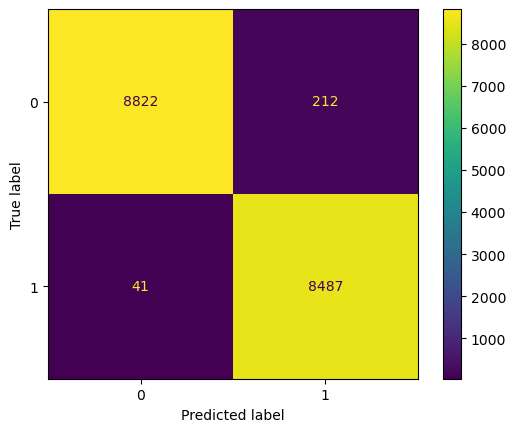

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9034
           1       0.98      1.00      0.99      8528

    accuracy                           0.99     17562
   macro avg       0.99      0.99      0.99     17562
weighted avg       0.99      0.99      0.99     17562

Training Accuracy: 0.99


In [62]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Step 1: Predict on the training data
pred_train_lr = model.predict(xv_train)  # Ensure 'model' is your trained logistic regression model

# Step 2: Compute the confusion matrix
cm_train = confusion_matrix(y_train, pred_train_lr)

# Step 3: Display the confusion matrix
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()  # Visualize the confusion matrix
plt.show()  # Ensure the plot is displayed if running in some environments

# Step 4: Print classification metrics
print("Classification Report for Training Data:")
print(classification_report(y_train, pred_train_lr))

# Optional: Print accuracy explicitly
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, pred_train_lr)
print(f"Training Accuracy: {accuracy_train:.2f}")


# Confusion metrics of testing data


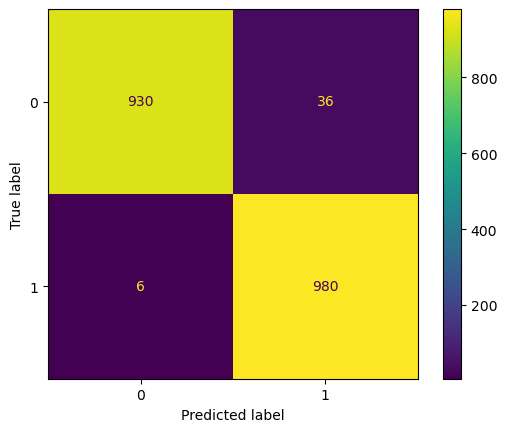

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       966
           1       0.96      0.99      0.98       986

    accuracy                           0.98      1952
   macro avg       0.98      0.98      0.98      1952
weighted avg       0.98      0.98      0.98      1952



In [64]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, pred_lr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()
print(classification_report(y_test, pred_lr))

# Roc Curve

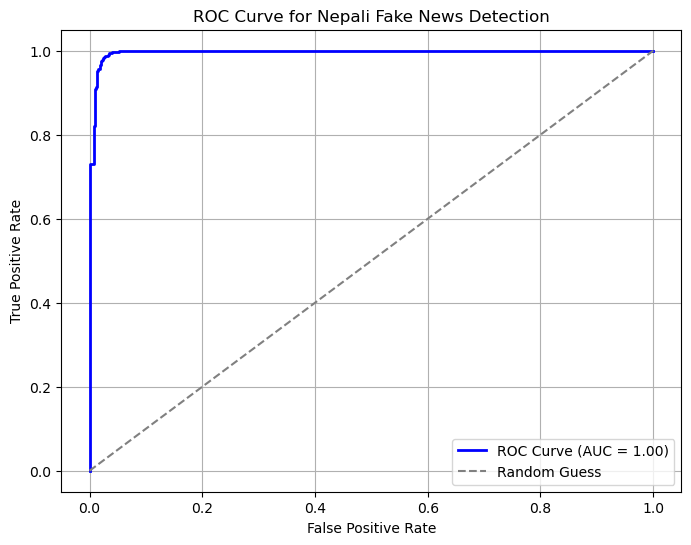

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have the following variables:
# X_test: Preprocessed testing data
# y_test: True labels for the testing data (0: Fake, 1: Real)
# model: Your trained classification model

# Step 1: Predict probabilities for the positive class
y_prob = model.predict_proba(xv_test)[:, 1]  # Probability of the positive class (Real News)

# Step 2: Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Step 3: Calculate AUC
auc = roc_auc_score(y_test, y_prob)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
plt.title("ROC Curve for Nepali Fake News Detection")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# MCC SCORE
#Matthews Correlation Coefficient (MCC) is a powerful metric for evaluating the performance of binary classifiers in machine learning. This article explores the nuances, complexities, and current challenges of MCC, along with recent research and practical applications.

In [68]:
from sklearn.metrics import matthews_corrcoef

# Assuming y_test is your true labels and y_pred is your model predictions
mcc_score = matthews_corrcoef(y_test, pred_lr)

print(f"MCC Score: {mcc_score}")


MCC Score: 0.9574019023619849


In [69]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"

def manual_testing(news):
    # Create a DataFrame from the input news
    testing_news = {"title3": [news]}
    new_def_test = pd.DataFrame(testing_news)

    # Apply preprocessing using wordopt (assuming it's a defined function)
    new_def_test["title3"] = new_def_test["title3"].apply(wordopt) 

    # Transform the text using vectorization
    new_x_test = new_def_test["title3"]
    new_xv_test = vectorization.transform(new_x_test)

    # Perform prediction using Logistic Regression
    pred_model = model.predict(new_xv_test)

    # Output the prediction result
    return print("\n\nLogistic Regression Prediction: {}".format(output_label(pred_model[0])))


In [70]:
news_input = " "
manual_testing(news_input)



Logistic Regression Prediction: Real News


In [71]:
from sklearn.metrics import confusion_matrix

# confusion metrics
confusion_matrix(y_test, pred_lr,labels=[0, 1])


array([[930,  36],
       [  6, 980]], dtype=int64)

In [72]:
import pickle


In [73]:
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

In [74]:

# load saved model
with open('model_pkl' , 'rb') as file:
    model= pickle.load(file)

In [75]:
input_text = [""]
input_vectorized = vectorization.transform(input_text)

In [76]:
# model.predict([["'राष्ट्रपति','पदका','उम्मेद्वार','मार्को','रु.."]])
prediction = model.predict(input_vectorized)
print(prediction)

[1]
